Number of images: 113000


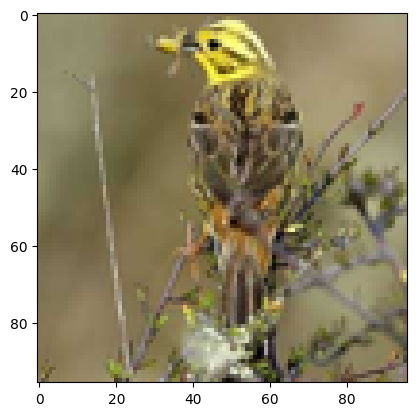

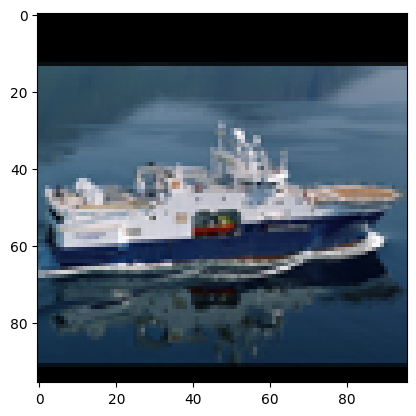

In [19]:
import os
import matplotlib.pyplot as plt
from PIL import Image

data_path = r'C:\Users\Mariam Yasser\Desktop\STL10_Project'
subfolders = ['train_images', 'test_images', 'unlabeled_images']

image_files = []

# Add images from folders
for folder in subfolders:
    folder_path = os.path.join(data_path, folder)
    
  #سطر عشان يتجاهل اي ملفات فالفولدر غير الصور
    image_files.extend([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))])

# Number of images
print(f'Number of images: {len(image_files)}')

# print some image
if len(image_files) > 0:
    for i in range(min(2, len(image_files))):  
        img_path = image_files[i]
        img = Image.open(img_path)
        plt.imshow(img)
        plt.show()
else:
    print("No images found.")



In [3]:
import numpy as np

# 1D 
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))  
    img = np.array(img) / 255.0  # Normalize values to [0, 1]
    return img.flatten()  # Convert image to 1D matrix

# for all image
image_vectors = [preprocess_image(img_path) for img_path in image_files[:1000]]  


In [5]:
from sklearn.cluster import KMeans

# K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(image_vectors)  # training

# Extract labels for each image
labels = kmeans.labels_

# Show for the first few images
print(labels[:10])


[2 3 0 6 8 8 3 6 0 6]


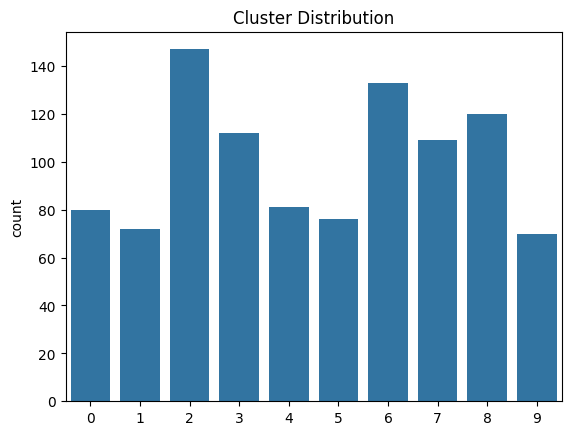

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# dist. cluster
sns.countplot(x=labels)
plt.title('Cluster Distribution')
plt.show()


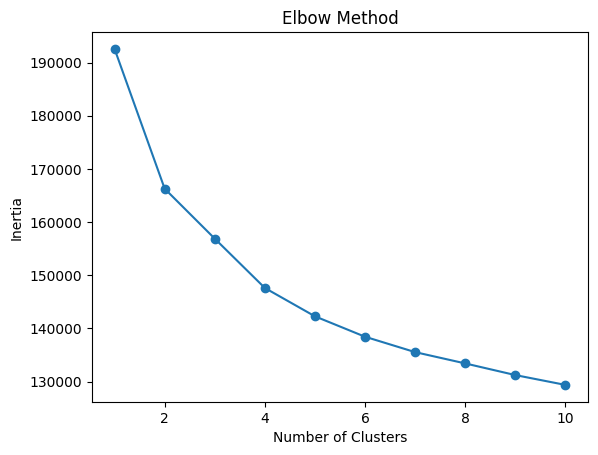

In [19]:
# Try several values for clusters and choose the optimal number
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(image_vectors)
    inertia.append(kmeans.inertia_)

# Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [16]:
from sklearn.metrics import silhouette_score

# comput Silhouette Score
score = silhouette_score(image_vectors, labels)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.06269516509416453


In [17]:
# Print label centers (centroids)
print("Cluster centers (centroids):")
print(kmeans.cluster_centers_)

Cluster centers (centroids):
[[0.53391431 0.58391431 0.60068991 ... 0.20181554 0.20243282 0.18100944]
 [0.50810114 0.51470588 0.44716202 ... 0.40956312 0.40369797 0.33104575]
 [0.24204545 0.24837344 0.22072193 ... 0.21631016 0.21998663 0.16633244]
 ...
 [0.02470137 0.02479153 0.02343926 ... 0.12909624 0.13531666 0.12873563]
 [0.56962127 0.58272898 0.5550094  ... 0.58404512 0.58071448 0.544722  ]
 [0.28575738 0.29737126 0.24703728 ... 0.51092437 0.50489119 0.43708253]]


Group 1:


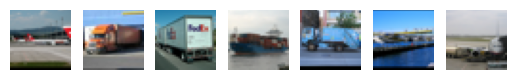

Group 2:


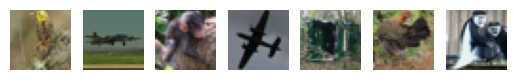

Group 3:


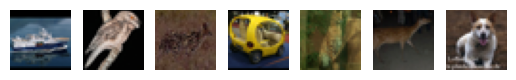

Group 4:


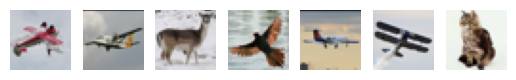

Group 5:


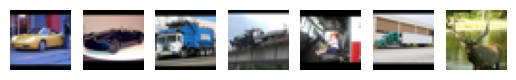

Group 6:


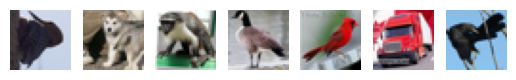

Group 7:


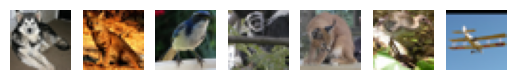

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# number of clusters (k)
k = 7

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(image_vectors)
labels = kmeans.labels_

grouped_images = {i: [] for i in range(k)} 

for i, label in enumerate(labels):
    grouped_images[label].append(image_files[i])  
    
# Display the images in each cluster
for label, image_paths in grouped_images.items():
    print(f"Group {label + 1}:")
    
#( first 7 images per group)
    for i, image_path in enumerate(image_paths[:7]):
        img = Image.open(image_path)  
        img = img.resize((32, 32))  
        plt.subplot(1, 7, i + 1)  
        plt.imshow(img)  
        plt.axis('off') 

    plt.show()  
